# Music Synchronization with Dynamic Time Warping

In this short tutorial, we demonstrate the use of dynamic time warping (DTW) for music synchronization
which is implemented in `librosa`.

We assume that you are familiar with the algorithm and focus on the application. Further information about
the algorithm can be found in the literature, e. g. [1].

Our example consists of two recordings of the first bars of the famous brass section lick in Stevie Wonder's rendition of "Sir Duke".
Due to differences in tempo, the first recording lasts for ca. 7 seconds and the second recording for ca. 5 seconds.
Our objective is now to find an alignment between these two recordings by using DTW.


**Author:** Stefan Balke <stefan.balke@audiolabs-erlangen.de>

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import scipy
%matplotlib inline
import librosa.display
import sys
try:
    sys.getwindowsversion()
except AttributeError:
    isWindows = False
else:
    isWindows = True

if isWindows:
    import win32api,win32process,win32con
    pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, win32process.HIGH_PRIORITY_CLASS)

## Load Audio Recordings

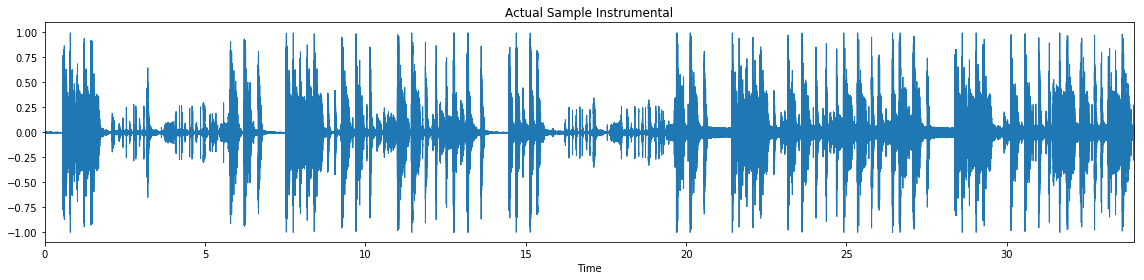

In [2]:
x_I, fsI = librosa.load('Audio/Aaliyah_Actual_Sample_Instrumental.wav')
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_I, sr=fsI)
plt.title('Actual Sample Instrumental')
plt.tight_layout()
plt.show()

In [3]:
display.Audio(data=x_I, rate=fsI)

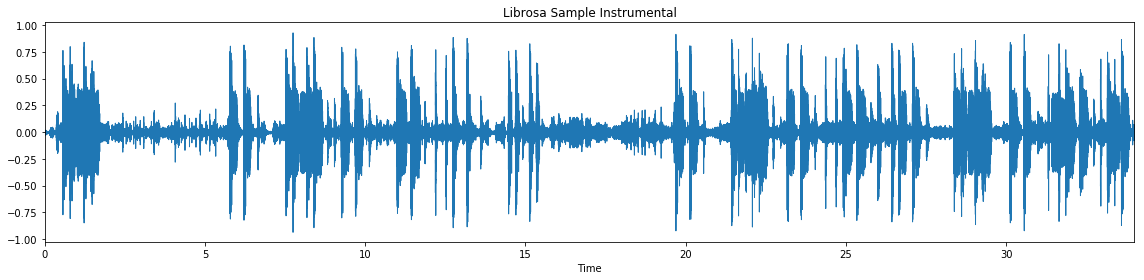

In [4]:
x_instrumental, fs = librosa.load('Audio/Aaliyah_Librosa_Sample_Instrumental.wav')
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_instrumental, sr=fs)
plt.title('Librosa Sample Instrumental')
plt.tight_layout()
plt.show()

In [5]:
display.Audio(data=x_instrumental, rate=fs)

## Extract Chroma Features

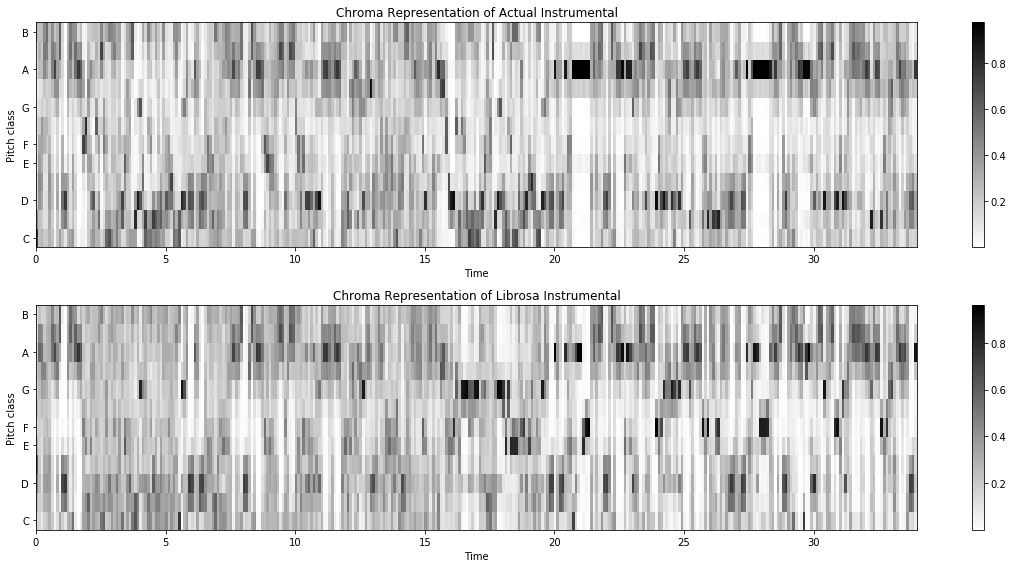

In [6]:
n_fft = 4410
hop_size = 2205

x_I_chroma = librosa.feature.chroma_stft(y=x_I, sr=fsI, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_instrumental_chroma = librosa.feature.chroma_stft(y=x_instrumental, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)

plt.figure(figsize=(16, 8))
plt.subplot(2,1,1)
plt.title('Chroma Representation of Actual Instrumental')
librosa.display.specshow(x_I_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2,1,2)
plt.title('Chroma Representation of Librosa Instrumental')
librosa.display.specshow(x_instrumental_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.tight_layout()
plt.show()

## Align Chroma Sequences

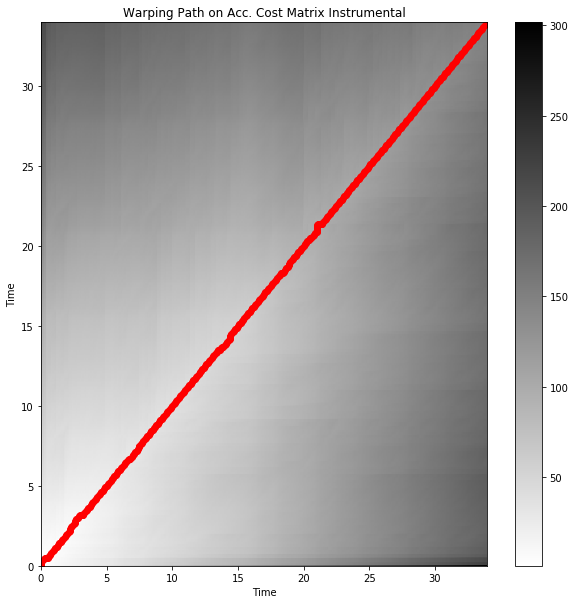

In [7]:
DI, wpI = librosa.core.dtw(X=x_I_chroma, Y=x_instrumental_chroma, metric='euclidean')
wp_sI = np.asarray(wpI) * hop_size / fs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(DI, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(DI, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_sI[:, 1], wp_sI[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix Instrumental')
plt.colorbar()
plt.show()

## Alternative Visualization in the Time Domain

We can also visualize the wariping path directly on our time domain signals.

Red lines connect corresponding time positions in the input signals.

(Thanks to F. Zalkow for the nice visualization.)

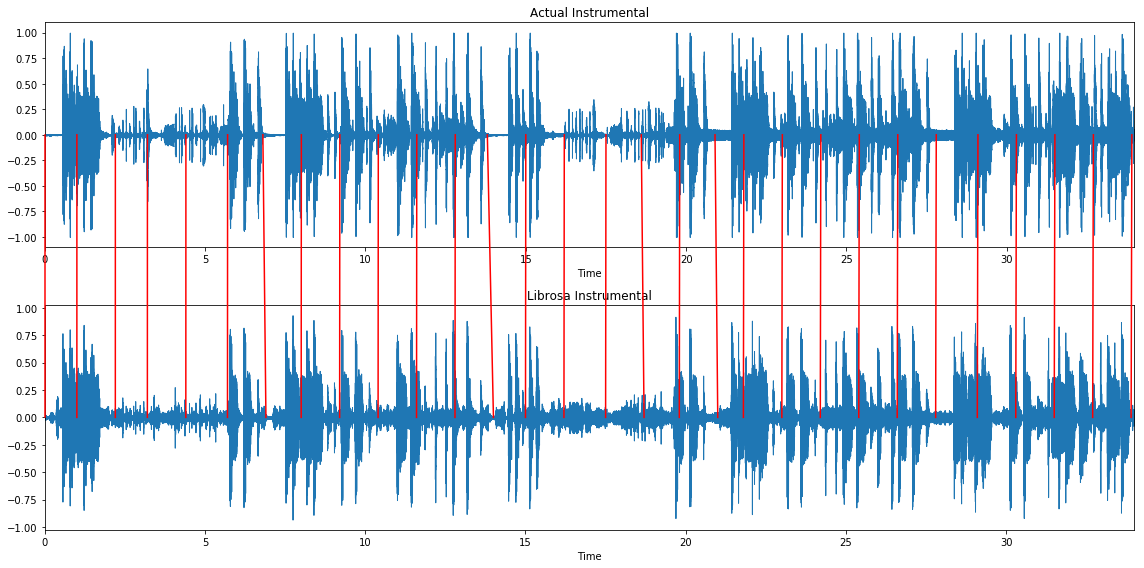

In [8]:
import matplotlib

fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_I, sr=fsI)
plt.title('Actual Instrumental')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_instrumental, sr=fs)
plt.title('Librosa Instrumental')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idxI = np.int16(np.round(np.linspace(0, wpI.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tpI1, tpI2 in wpI[points_idxI] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tpI1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tpI2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()
plt.show()

Do the same thing for vocals

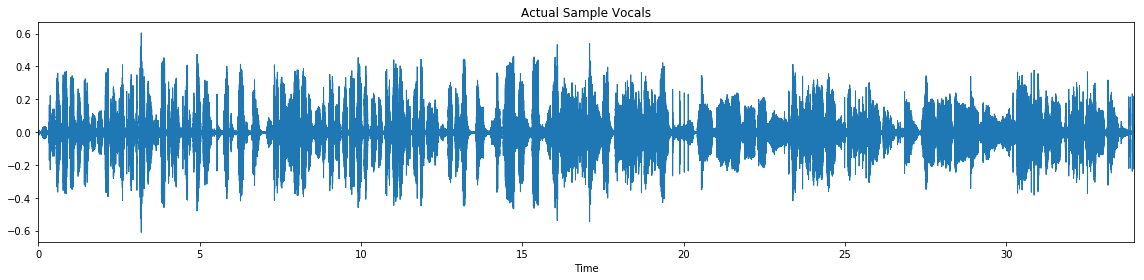

In [9]:
x_A, fsA = librosa.load('Audio/Aaliyah_Actual_Sample_Vocals.wav')
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_A, sr=fsA)
plt.title('Actual Sample Vocals')
plt.tight_layout()
plt.show()

In [10]:
display.Audio(data=x_A, rate=fsA)

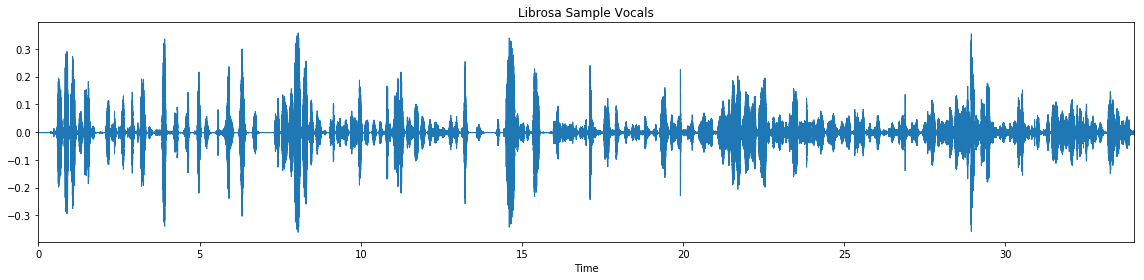

In [11]:
x_acapella, fs = librosa.load('Audio/Aaliyah_Librosa_Sample_Vocals.wav')
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_acapella, sr=fs)
plt.title('Librosa Sample Vocals')
plt.tight_layout()
plt.show()

In [12]:
display.Audio(data=x_acapella, rate=fs)

## Extract Chroma Features

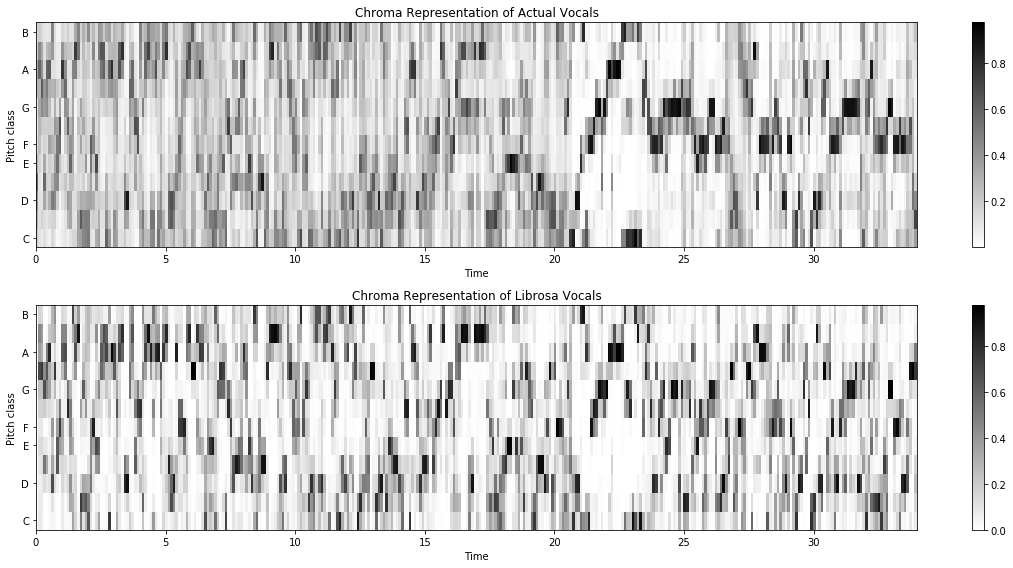

In [17]:
n_fft = 4410
hop_size = 2205

x_A_chroma = librosa.feature.chroma_stft(y=x_A, sr=fsA, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_acapella_chroma = librosa.feature.chroma_stft(y=x_acapella, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)

plt.figure(figsize=(16, 8))
plt.subplot(2,1,1)
plt.title('Chroma Representation of Actual Vocals')
librosa.display.specshow(x_A_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2,1,2)
plt.title('Chroma Representation of Librosa Vocals')
librosa.display.specshow(x_acapella_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.tight_layout()
plt.show()

## Align Chroma Sequences

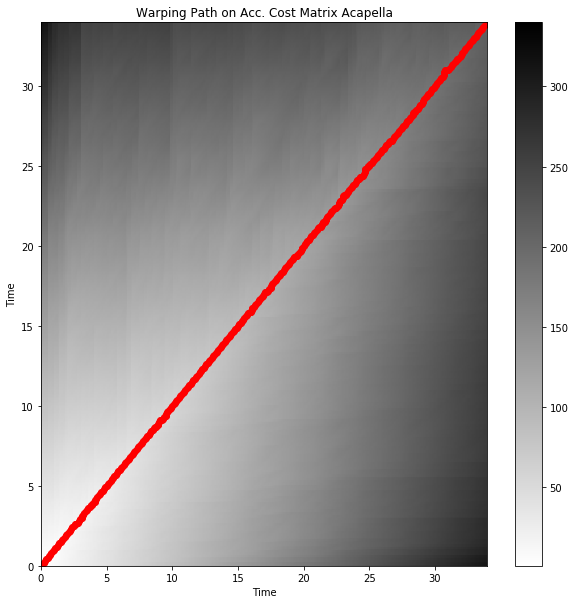

In [16]:
DA, wpA = librosa.core.dtw(X=x_A_chroma, Y=x_acapella_chroma, metric='euclidean')
wp_sA = np.asarray(wpA) * hop_size / fs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(DA, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(DA, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_sA[:, 1], wp_sA[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix Acapella')
plt.colorbar()
plt.show()

## Alternative Visualization in the Time Domain

We can also visualize the wariping path directly on our time domain signals.

Red lines connect corresponding time positions in the input signals.

(Thanks to F. Zalkow for the nice visualization.)

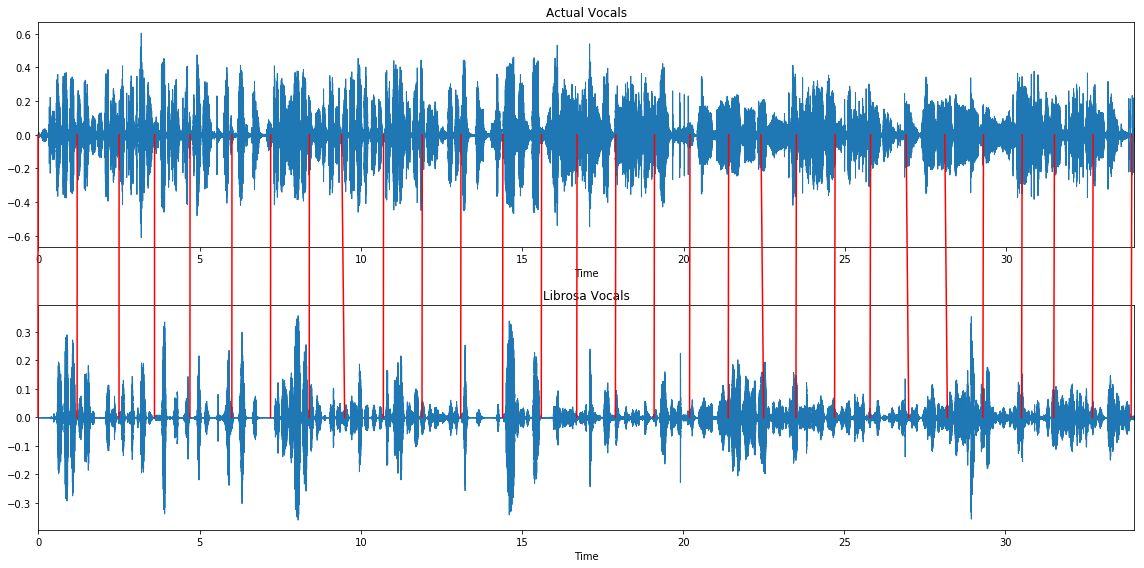

In [15]:
import matplotlib

fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_A, sr=fsA)
plt.title('Actual Vocals')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_acapella, sr=fs)
plt.title('Librosa Vocals')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idxA = np.int16(np.round(np.linspace(0, wpA.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tpA1, tpA2 in wpA[points_idxA] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tpA1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tpA2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()
plt.show()

# Next steps...

Alright, you might ask where to go from here. Once we have the warping path between our two signals, we could realize different applications. One example is a player which enables you to navigate between different recordings of the same piece of music, e.g. one of Wagner's symphonies played by an orchestra or in a piano-reduced version.

Another example is that you could apply time scale modification algorithms, e.g. speed up the slower signal to the tempo of the faster one.

## Literature

[1] Meinard Müller, Fundamentals of Music Processing — Audio, Analysis, Algorithms, Applications. Springer Verlag, 2015.